# Dictionary generator
Here I'd try to make a big dictionary  

In [1]:
import re
import time
import datetime

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw, ImageFont
from datetime import datetime, timedelta

%matplotlib inline

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Data

## English word-Chinese character dictionary
English-Chinese dictionary is taken from https://www.mdbg.net/chinese/dictionary?page=cedict

Format of the dictionary line:

```
Traditional Simplified [pin1 yin1] /English equivalent 1/equivalent 2/

```

Example of the line:
```
雀鳥 雀鸟 [que4 niao3] /bird/
```

One word to one character dictionary

In [2]:
word2hier = dict()
for line in open('data/cedict_ts.u8', 'r', encoding='utf-8'):
    if re.match(r'#.*', line):
#   Skip comments
        continue
    
    ch_trad, ch_simp, line = re.split(r' ', line, maxsplit=2)
#   We use simplified characters
    ch = ch_simp
    
    if not re.match(u'[\u4e00-\u9fff]\Z', ch):
#   Skip if ch contains more than one character
        continue
    
    _, eng_eqs = re.split(r'] /', line, maxsplit=1)
    eng_eqs = eng_eqs.split('/')[:-1]
    
#   Select only equivalents containing only one word
    eng_eqs = [eq for eq in eng_eqs if re.match(r'\w+\Z', eq)]
    
    for eng_eq in eng_eqs:
        word2hier[eng_eq] = ch

In [3]:
len(word2hier.keys())

4795

## Generate images from unicode srtings

In [4]:
def draw_char(ch, size=64, bw=False):
    img = Image.new("RGB",[size,size], "black")
    
    font = ImageFont.truetype('data/CODE2000.TTF', size, encoding="unic")
    ImageDraw.Draw(img).text((0, -size * 0.125), ch, fill="white", font=font)
    
    img = np.asarray(img)
    bwing = np.zeros((img.shape[0], img.shape[1]))

    if bw:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j, 0] > 0:
                    bwing[i, j] = 1
    else:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                    bwing[i, j] = img[i, j, 0]
    img = bwing
    return img

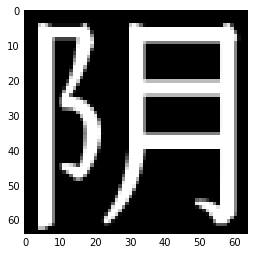

In [5]:
plt.imshow(draw_char(word2hier["moon"]), cmap = plt.get_cmap('gray'), interpolation="nearest")
plt.show()

## Reading word2vec
word2vec set is taken from http://nlp.stanford.edu/data/glove.42B.300d.zip

Containes pre-trained 300-dimensional vectors trained on Common Crawl (42B) dataset

In [6]:
word2vec = {}

lcount = 0
wcount = 0

for line in open('./data/glove.42B.300d.txt', 'r', encoding='utf-8'):
    word, vect = line.split(" ", maxsplit=1)
    
    if word in word2hier.keys():
        wcount += 1
        vect = [float(n) for n in vect[:-1].split(" ")]
        word2vec[word] = vect
    
    lcount += 1
    if (lcount % 100000 == 0):
        print("{} lines read, {} words found".format(lcount, wcount))
       
print("{} lines read, {} words found".format(lcount, wcount))

100000 lines read, 4438 words found
200000 lines read, 4594 words found
300000 lines read, 4636 words found
400000 lines read, 4662 words found
500000 lines read, 4673 words found
600000 lines read, 4679 words found
700000 lines read, 4687 words found
800000 lines read, 4688 words found
900000 lines read, 4692 words found
1000000 lines read, 4695 words found
1100000 lines read, 4697 words found
1200000 lines read, 4702 words found
1300000 lines read, 4704 words found
1400000 lines read, 4704 words found
1500000 lines read, 4704 words found
1600000 lines read, 4705 words found
1700000 lines read, 4705 words found
1800000 lines read, 4705 words found
1900000 lines read, 4705 words found
1917494 lines read, 4706 words found


## Compose word to vector and character dictionary

In [7]:
char_size = 64

word2vec_char = {}
wcount = 0

for key in word2vec:
    word2vec_char[key] = {"vect": word2vec[key], "char": draw_char(word2hier[key], size=char_size).ravel()}
    
    wcount += 1
    if (wcount % 1000 == 0):
        print("{} words processed".format(wcount))
        
print("{} words processed".format(wcount))

1000 words processed
2000 words processed
3000 words processed
4000 words processed
4706 words processed


# Write everything

In [ ]:
timestamp = datetime.datetime.now().strftime("%d_%m_%y_%H_%m_%S")
filename = "./data/word2_{}_vector2_{}x{}hier_{}.txt".format(len(word2vec["cat"]), 
                                                            char_size, char_size, 
                                                            timestamp)
print("writing to file: {}".format(filename))
fld = open(filename, 'w')

lcount = 0
for key in word2vec_char:
    
    vector = " ".join([str(n) for n in word2vec_char[key]["vect"]])
    image = " ".join([str(n) for n in word2vec_char[key]["char"]])
    try:
        fld.write("{},{},{}\n".format(key, vector, image))
    except:
        print(key)
    
    lcount +=1
    if (lcount % 1000 == 0):
        print("{} lines wrote".format(lcount))
        
fld.close()
print("{} lines wrote".format(lcount))

# An attempt to generate more Data

## Character images dataset augmentation
Let's create 100 versions for every char

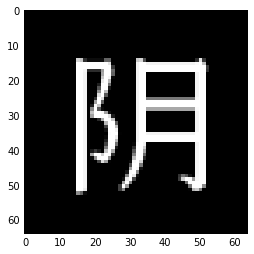

In [8]:
def draw_small_char(ch, size=64, bw=False):
    img = Image.new("RGB",[size,size], "black")
    
    font = ImageFont.truetype('data/CODE2000.TTF', int(size*0.66), encoding="unic")
    ImageDraw.Draw(img).text((size * 0.20, size * 0.1), ch, fill="white", font=font)
    
    img = np.asarray(img)
    bwing = np.zeros((img.shape[0], img.shape[1]))

    if bw:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j, 0] > 0:
                    bwing[i, j] = 1
    else:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                    bwing[i, j] = img[i, j, 0]
    img = bwing
    return img

plt.imshow(draw_small_char(word2hier["moon"]), cmap = plt.get_cmap('gray'), interpolation="nearest")
plt.show()

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Prepare data arrays

In [10]:
# word2vec vectors
X_vec = []
# character
Y_chr = []

wcount = 0
for word in word2vec:
    X_vec.append(word2vec[word])
    chr_img = draw_small_char(word2hier[word])
    Y_chr.append(np.reshape(chr_img, (chr_img.shape[0], chr_img.shape[1], 1)))
    
    wcount += 1
    if (wcount % 1000 == 0):
        print("{} words processed".format(wcount))
        
print("{} words processed".format(wcount))

X_vec = np.array(X_vec)
Y_chr = np.array(Y_chr)

1000 words processed
2000 words processed
3000 words processed
4000 words processed
4706 words processed


In [15]:
datagen = ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.05,
                             height_shift_range=0.05,
                             zoom_range=0.45,
                             horizontal_flip=True,
                             vertical_flip=True)

datagen.fit(Y_chr)

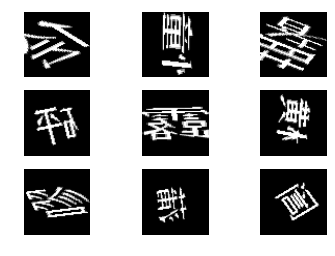

In [16]:
for Y_batch, X_batch in datagen.flow(Y_chr, X_vec, batch_size=9):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(Y_batch[i].reshape(64, 64), cmap=plt.get_cmap('gray'))
        plt.axis('off')
    plt.show()
    break

In [17]:
timestamp = datetime.now().strftime("%d_%m_%y_%H_%M_%S")
filename = "./data/vector{}_to_char{}x{}_{}.txt".format(len(word2vec["cat"]), 
                                                        char_size, 
                                                        char_size, 
                                                        timestamp)
batch_size = 200
n_batches = Y_chr.shape[0]

In [18]:
print("writing to file: {}".format(filename))
fld = open(filename, 'w')

i = 0
start_time = time.time()

for Y_batch, X_batch in datagen.flow(Y_chr, X_vec, batch_size=batch_size):
    
    for j in range(X_batch.shape[0]):
        vec = " ".join([str(num) for num in X_batch[j]])
        img = " ".join([str(num) for num in Y_batch[j].ravel()])
        fld.write("{},{}\n".format(vec, img))
    
    i += 1
    
    if (i % 500 == 0):
        curr_time = time.time()
        
        if i > 0:
            time_est = (curr_time - start_time) * (n_batches - i) / i
        else:
            time_est = (curr_time - start_time) * n_batches
        time_est_str = str(timedelta(seconds=time_est)).split('.')[0]
        
        print("{} of {} batches processed |Time est {}".format(i, n_batches, time_est_str))
    if i >= n_batches:
        break

print("{} of {} batches processed".format(i, n_batches))

fld.close()

writing to file: ./data/vector300_to_char64x64_27_03_18_20_13_48.txt
500 of 4706 batches processed |Time est 0:32:45
1000 of 4706 batches processed |Time est 0:28:46
1500 of 4706 batches processed |Time est 0:24:51
2000 of 4706 batches processed |Time est 0:20:58
2500 of 4706 batches processed |Time est 0:17:04
3000 of 4706 batches processed |Time est 0:13:12
3500 of 4706 batches processed |Time est 0:09:19
4000 of 4706 batches processed |Time est 0:05:27
4500 of 4706 batches processed |Time est 0:01:35
4706 of 4706 batches processed
